# Cross-Country Solar Comparison
EDA and statistical comparison for Benin, Sierra Leone, and Togo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierra_leone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

In [4]:
# Summary statistics for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']

# Create list of dicts first
rows = []

for df, country in zip([benin, sierra, togo], ['Benin', 'Sierra Leone', 'Togo']):
    for metric in metrics:
        rows.append({
            'Country': country,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Std': df[metric].std()
        })

# Convert to DataFrame
summary = pd.DataFrame(rows)
summary


,Country,Metric,Mean,Median,Std
0,Benin,GHI,236.234508,0.7,328.288787
1,Benin,DNI,166.896673,-0.1,262.081997
2,Benin,DHI,111.656477,0.5,153.099749
3,Sierra Leone,GHI,185.000024,-0.4,279.019460
4,Sierra Leone,DNI,104.128943,-0.1,200.954182
5,Sierra Leone,DHI,108.104278,-0.6,153.691835
6,Togo,GHI,223.859675,0.5,317.306277
7,Togo,DNI,147.975931,0.0,247.683690
8,Togo,DHI,112.781249,1.5,151.571744


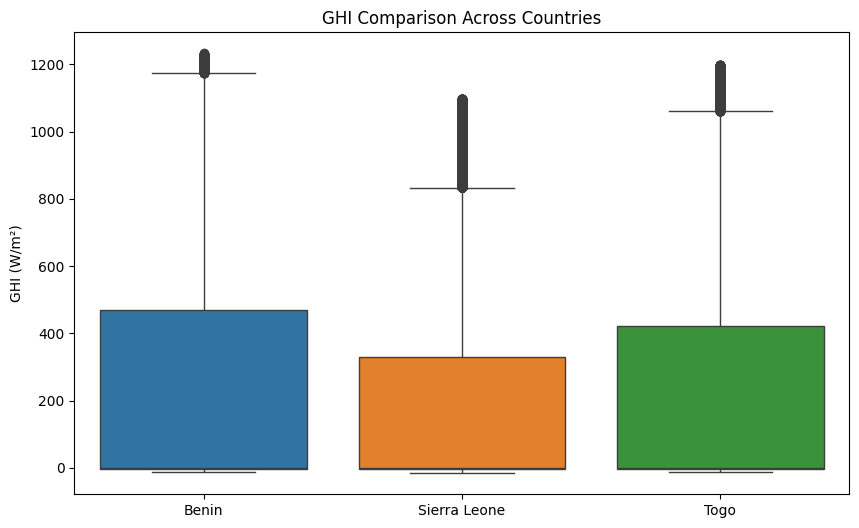

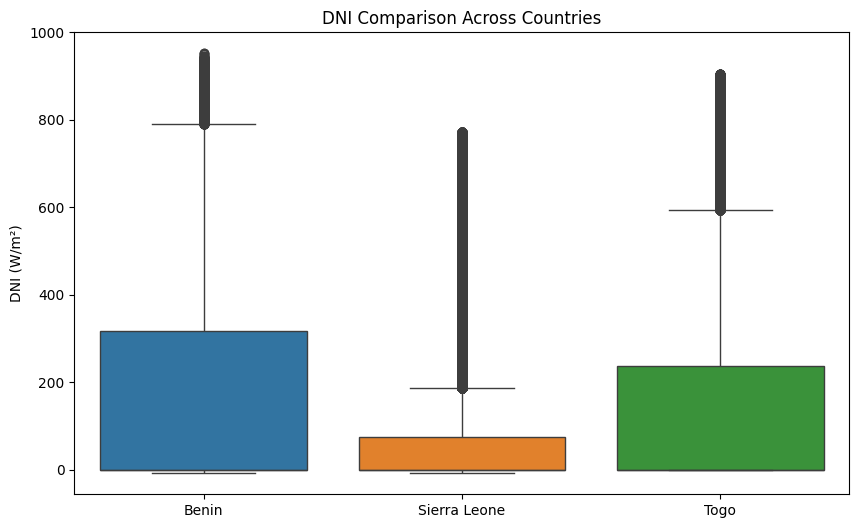

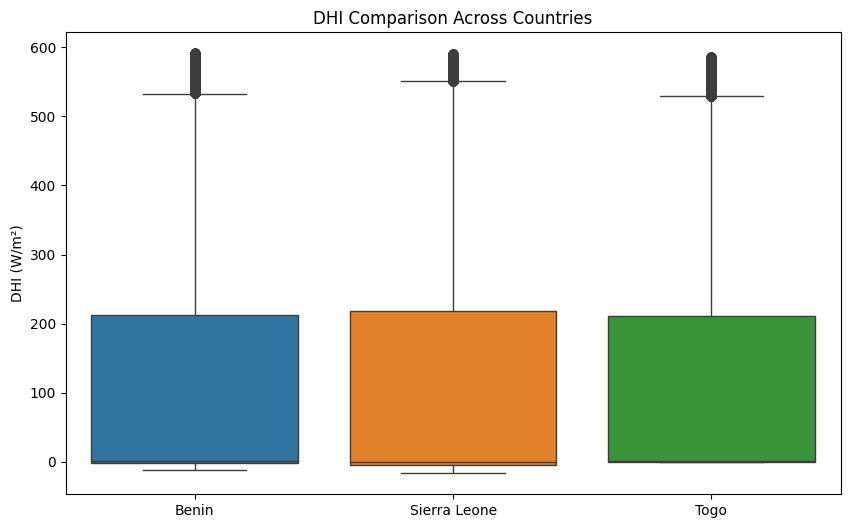

In [5]:
# Boxplots for GHI, DNI, DHI
for metric in metrics:
    plt.figure(figsize=(10,6))
    data_dict = {
        'Benin': benin[metric],
        'Sierra Leone': sierra[metric],
        'Togo': togo[metric]
    }
    sns.boxplot(data=pd.DataFrame(data_dict))
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()

In [6]:
# ANOVA test for GHI
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 3833.18, p-value: 0.0000


## Key Observations
- Benin shows highest median GHI but also highest variability.
- Togo has lower DNI on average compared to the other countries.
- Sierra Leone shows moderate solar potential with relatively stable trends.